In [1]:
import gzip
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from itertools import cycle

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# get data
dat = pd.read_csv('finaldf_all.csv')
dat2 = dat.loc[:,['totval','neighborhood','sqft','latitude','longitude']]
ind = list(np.where(dat2['sqft']==0)[0])
dat2.loc[ind, 'sqft'] = np.nan
dat3 = dat2.dropna(axis=0, how='any')

In [18]:
dat3.shape[0]

21565

In [ ]:
dat.dropna(axis=0, how='any')

In [30]:
# Total number of points in the dataset
number_of_points = dat3.shape[0]

# The dimension of each point. Since we will visualize the clustered points later, we set it to 2.
dimension = 2

number_of_clusters = 40 #New Haven is made up of approximately 40 distinct neighborhoods

#true_centroids = np.random.rand(number_of_clusters, dimension)
true_assignments = np.array(dat3.loc[:,'neighborhood'])

points_values = np.array(dat3.loc[:,['latitude','longitude']])
# The maximum number of iterations in the k-means algorithm
maximum_number_of_steps = 1000

points = tf.constant(points_values,tf.float32)
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [number_of_clusters, -1]))
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

# compute the distances and closest_center 
distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

In [31]:
# For each cluster c, let's compute the mean of all points currently assigned to the cluster c
means = []
for c in xrange(number_of_clusters):
    means.append(tf.reduce_mean(
      tf.gather(points,
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1]))
new_centroids = tf.concat(means, 0)

In [32]:
# placeholder
old_centroids = tf.Variable(tf.random_normal([number_of_clusters,dimension]), tf.float32)
assign_old = tf.assign(old_centroids, centroids)
update_centroids = tf.assign(centroids, new_centroids)

# compute the change of centers
d_change = tf.reduce_sum(tf.square(tf.subtract(old_centroids, centroids)),1)

In [33]:
done = False
with tf.Session() as sess: 
    tf.global_variables_initializer().run() 
    while not(done):
        [_, _, centers, center_change, points_values, ass] = \
        sess.run([update_centroids, assign_old, centroids,d_change, points, assignments])
        if (np.linalg.norm(center_change) < 10**(-6)):
            done = True

    print "centroids" + "\n", centers
    print "center_change" + "\n", center_change



centroids
[[ 41.27119446 -72.89614105]
 [ 41.32077408 -72.95304871]
 [ 41.32664108 -72.97812653]
 [ 41.28992081 -72.89136505]
 [ 41.32502365 -72.87762451]
 [ 41.32687378 -72.91712189]
 [ 41.33293152 -72.86417389]
 [ 41.33475494 -72.97111511]
 [ 41.31305695 -72.87648773]
 [ 41.30854797 -72.90032959]
 [ 41.31725693 -72.96839142]
 [ 41.30641174 -72.89086914]
 [ 41.30697632 -72.92433167]
 [ 41.32283401 -72.96071625]
 [ 41.29340363 -72.89653015]
 [ 41.32423019 -72.97332764]
 [ 41.32088089 -72.96538544]
 [ 41.31387711 -72.89067078]
 [ 41.33059311 -72.95536804]
 [ 41.31646347 -72.96277618]
 [ 41.28190231 -72.89593506]
 [ 41.30920792 -72.91601562]
 [ 41.31791306 -72.89841461]
 [ 41.33183289 -72.98070526]
 [ 41.32981491 -72.93254852]
 [ 41.33080673 -72.87445831]
 [ 41.32531738 -72.94544983]
 [ 41.31797409 -72.97754669]
 [ 41.31623459 -72.94824219]
 [ 41.32367325 -72.87110138]
 [ 41.29845047 -72.88991547]
 [ 41.25747299 -72.89342499]
 [ 41.31838989 -72.92778015]
 [ 41.30587387 -72.88075256]
 [ 4

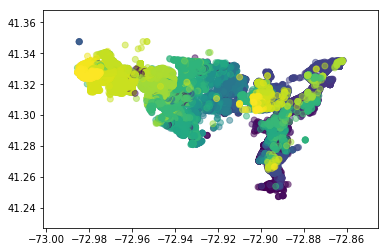

In [51]:
plt.scatter(points_values[:, 1], points_values[:, 0], c = pd.factorize(true_assignments)[0], alpha=0.5)
plt.show()

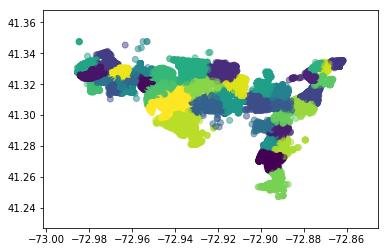

In [52]:
plt.scatter(points_values[:, 1], points_values[:, 0], c = ass, alpha=0.5)
plt.show()